In [71]:
#Libraries
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances

In [72]:
df = pd.read_excel(r"C:\Users\20344807257\Desktop\Santiago\Bases\Permisos\base_2012_2022_limpia.xlsx")
#MacOS
#df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")

#Select 2022
#df = df[df["ANIO"] == 2022]

#Geojson barrios caba
GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)

#Point geometries from lat, long columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))

#Boundary of CABA
boundary = unary_union(geojson["geometry"]).exterior

#Removing al points outside of the boundary

# perform spatial join
joined = gpd.sjoin(gdf, geojson, op='within')

# filter out points that do not intersect with the boundary
points_within_boundary = joined[joined.index_right.notnull()]
points_within_boundary["TIPO_OBRA"] = points_within_boundary["TIPO_OBRA"].astype(str)
clean_df = points_within_boundary
clean_df["USO_1"].unique()

C:\Users\20344807257\PycharmProjects\Trabajo\venv\Lib\site-packages\IPython\core\interactiveshell.py:3400: FutureWarning: The `op` parameter is deprecated and will be removed in a future release. Please use the `predicate` parameter instead.
  if await self.run_code(code, result, async_=asy):
C:\Users\20344807257\AppData\Local\Temp\ipykernel_8908\2925280178.py:21: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  joined = gpd.sjoin(gdf, geojson, op='within')


array(['VIVIENDA MULTIFAMILIAR', 'SIN DATOS', 'VIVIENDA UNIFAMILIAR',
       'OTROS', 'SALUD', 'LOCAL COMERCIAL', 'OFICINAS',
       'GARAGE COMERCIAL', 'BANCO', 'EDUCACION', 'ESTUDIOS PROFESIONALES',
       'COCHERAS', 'HOTELERIA', 'ENTRETENIMIENTO', 'GASTRONOMIA',
       'OFICINAS COMERCIALES', 'USOS INDUSTRIALES', 'HOTEL', 'TEMPLO',
       'GALERIA COMERCIAL', nan, 'DEPOSITO', 'MODIFICACION',
       'COMERCIO MINORISTA', 'GIMNASIO', 'OFICINA COMERCIAL',
       'LOCAL COMERCIO', 'DEPOSITOS', 'COMERCIO USO UNICO',
       'VIVENDA MULTIFAMILIAR', 'ESTADIO', 'TEATRO'], dtype=object)

In [73]:
clean_df = clean_df[clean_df["TIPO_OBRA"] == "1"]

#clean_df = clean_df[(clean_df["USO_1"] == "VIVIENDA UNIFAMILIAR") | (clean_df["USO_1"] == "VIVIENDA MULTIFAMILIAR")]

#clean_df = clean_df[clean_df["USO_1"] == "LOCAL COMERCIAL"]

clean_df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ANIO,MES,TRIMESTRE,FECHA,DIRECCION,TIPO_OBRA,TIPO_OBRA_CUR,...,add,location,address,geometry,index_right,BARRIO,COMUNA_right,PERIMETRO,AREA,OBJETO
0,0,0.0,7,2022,1,1.0,3 ene 2022,GUARDIA VIEJA 3764,1,OBRA MAYOR,...,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",0.0,"GUARDIA VIEJA 3764 ALMAGRO Buenos Aires, Argen...",POINT (-58.41723 -34.60122),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
2,2,2.0,9,2022,3,1.0,3 mar 2022,RAWSON 276,1,Obra Mayor,...,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",2.0,"RAWSON 276 ALMAGRO Buenos Aires, Argentina",POINT (-58.42628 -34.60916),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
4,4,4.0,11,2022,3,1.0,2 mar 2022,LAMBARE 847,1,OBRA MAYOR,...,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",4.0,"LAMBARE 847 ALMAGRO Buenos Aires, Argentina",POINT (-58.43047 -34.60510),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
5,5,5.0,12,2022,3,1.0,4 mar 2022,HUMAHUACA 3787,1,OBRA MAYOR,...,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",5.0,"HUMAHUACA 3787 ALMAGRO Buenos Aires, Argentina",POINT (-58.41762 -34.60217),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
6,6,6.0,13,2022,2,1.0,1 feb 2022,SARMIENTO 4088,1,OBRA MAYOR,...,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",6.0,"SARMIENTO 4088 ALMAGRO Buenos Aires, Argentina",POINT (-58.42254 -34.60481),4,ALMAGRO,5.0,8537.901368,4.050752e+06,BARRIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24283,20360,NaN,16811,2016,11,4.0,00:00:00,TRELLES 2031,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.46482 -34.60505),25,VILLA GRAL. MITRE,11.0,6290.440561,2.162275e+06,BARRIO
24284,20361,NaN,16812,2013,8,3.0,2013-08-14 00:00:00,TRELLES 2041,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.46485 -34.60498),25,VILLA GRAL. MITRE,11.0,6290.440561,2.162275e+06,BARRIO
24285,20362,NaN,16813,2013,4,2.0,2013-04-03 00:00:00,TRELLES 2107,1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.46547 -34.60413),25,VILLA GRAL. MITRE,11.0,6290.440561,2.162275e+06,BARRIO
24923,21000,NaN,17346,2012,12,4.0,2012-12-13 00:00:00,"VIALE, LUIS 2044",1,SIN DATOS,...,NaN,NaN,NaN,POINT (-58.46395 -34.61465),25,VILLA GRAL. MITRE,11.0,6290.440561,2.162275e+06,BARRIO


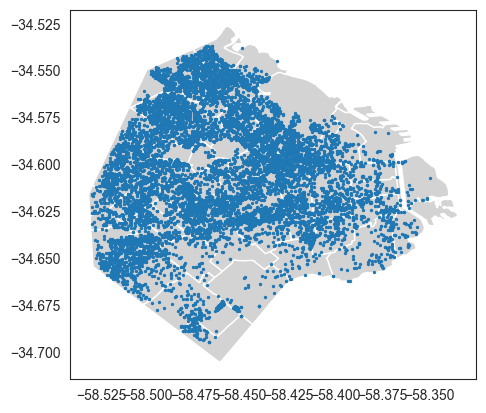

In [74]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df.plot(ax=ax, markersize=2)
#points_within_boundary.plot(ax=ax, markersize=2)
plt.show()

[<Axes: > <Axes: > <Axes: >]
[<Axes: > <Axes: > <Axes: >]
[<Axes: > <Axes: > <Axes: >]


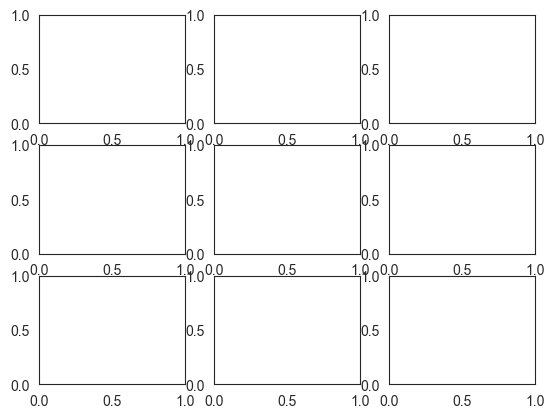

In [75]:
fig, ax = plt.subplots(3,3)
for i in ax:
    print(i)

In [76]:
for i in df["USO_1"].unique():
    for j,x in [2013,2014,2015,2016,2017,2018,2019,2020,2022]:
        fig, ax = plt.subplots(3,3)
        #fig.set_dpi(900)
        sns.set_style("white")
        geojson["geometry"].plot(ax=[ax for ax in ax], color='lightgrey')
        sns.kdeplot(data=clean_df[(clean_df["USO_1"] == i) | (clean_df["ANIO"] == j)],y="Latitud",x="Longitud",ax=[ax for ax in ax], levels=200,
                    fill=True,
                    alpha=0.5,
                    cmap="Reds").set(title=f"Uso: {i}. 2022")
        ax.set_axis_off()
        plt.show()

TypeError: cannot unpack non-iterable int object

In [ ]:
columns = 3
rows = 3
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
for i,ax_row in enumerate(ax_array):
    for j,axes in enumerate(ax_row):
        axes.set_title('{},{}'.format(i,j))
        axes.set_yticklabels([])
        axes.set_xticklabels([])
        geojson["geometry"].plot(ax=axes, color='lightgrey')
        sns.kdeplot(data=clean_df[(clean_df["USO_1"] == "LOCAL COMERCIAL") | (clean_df["ANIO"] == [x for x in range(2014,2023)])],y="Latitud",x="Longitud",ax=axes,levels=200,
        fill=True,
        alpha=0.5,
        cmap="Reds").set(title=f"Uso: {i}. 2022")
        plt.show()

In [ ]:
print([x for x in range(2012,2022)])

In [ ]:
columns = 3
rows = 3
fig, ax_array = plt.subplots(rows, columns,squeeze=False)
ax = plt.subplot(rows,cols,i+1)#%%
#Libraries
import matplotlib.pyplot as plt
from shapely.ops import unary_union
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.metrics.pairwise import haversine_distances

In [ ]:
df = pd.read_excel(r"C:\Users\20344807257\Desktop\Santiago\Bases\Permisos\base_2012_2022_limpia.xlsx")
#MacOS
#df = pd.read_excel("/Users/santi/Desktop/Work/Bases/base_2012_2022_limpia.xlsx")

#Select 2022
#df = df[df["ANIO"] == 2022]

#Geojson barrios caba
GeoJson_barrios = "https://cdn.buenosaires.gob.ar/datosabiertos/datasets/ministerio-de-educacion/barrios/barrios.geojson"
geojson = gpd.read_file(GeoJson_barrios)

#Point geometries from lat, long columns
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy( df["Longitud"], df["Latitud"]))

#Boundary of CABA
boundary = unary_union(geojson["geometry"]).exterior

#Removing al points outside of the boundary

# perform spatial join
joined = gpd.sjoin(gdf, geojson, op='within')

# filter out points that do not intersect with the boundary
points_within_boundary = joined[joined.index_right.notnull()]
points_within_boundary["TIPO_OBRA"] = points_within_boundary["TIPO_OBRA"].astype(str)
clean_df = points_within_boundary
clean_df["USO_1"].unique()

In [ ]:
clean_df = clean_df[clean_df["TIPO_OBRA"] == "1"]

#clean_df = clean_df[(clean_df["USO_1"] == "VIVIENDA UNIFAMILIAR") | (clean_df["USO_1"] == "VIVIENDA MULTIFAMILIAR")]

#clean_df = clean_df[clean_df["USO_1"] == "LOCAL COMERCIAL"]

clean_df

In [ ]:
fig, ax = plt.subplots()
geojson["geometry"].plot(ax=ax, color='lightgrey')
clean_df.plot(ax=ax, markersize=2)
#points_within_boundary.plot(ax=ax, markersize=2)
plt.show()

In [ ]:
for i in df["USO_1"].unique():
    fig, ax = plt.subplots()
    fig.set_dpi(400)
    sns.set_style("white")
    geojson["geometry"].plot(ax=ax, color='lightgrey')
    sns.kdeplot(data=clean_df[(clean_df["USO_1"] == i) | (clean_df["ANIO"] == 2022)],y="Latitud",x="Longitud",ax=ax, levels=200,
                fill=True,
                alpha=0.5,
                cmap="Reds").set(title=f"Uso: {i}. 2022")
    ax.set_axis_off()
    plt.show()
    fig, ax = plt.subplots()
    #fig.set_dpi(900)
    sns.set_style("white")
    geojson["geometry"].plot(ax=ax, color='lightgrey')
    sns.kdeplot(data=clean_df[clean_df["USO_1"] == i],y="Latitud",x="Longitud",ax=ax, levels=300,
                fill=True,
                alpha=0.2,
                cmap="Reds").set(title=f"Uso: {i}. 2012-2022")
    ax.set_axis_off()
    plt.show()



#plt.savefig("comercios_hetmap.png",dpi=1000)
